<a href="https://colab.research.google.com/github/Manjiri1101/CMPE255-Manjiri/blob/main/earthquake_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Data cleaning practice exercise
## CMPE 255 - Data mining

### Name : Manjiri Kadam

**To do:**


1.   Pick a kaggle data set which might be fairly noisy
2.   Write a data cleaning and preprocessing  and visualization colab using any data set 
3.   Do model training with scikit learn as well but we will not check the accuracy/performance of the model. the main focus is whether you did the right data cleaning





---

## Dataset Used:

**Dataset**:  **[Significant Earthquakes (1965-2016) ](https://www.kaggle.com/usgs/earthquake-database)**

**Description** :

The National Earthquake Information Center (NEIC) examines and determines the attibutes of the significant Earthquake all over the world. They make this seismic information available to international agencies, scientiests, and the general public. This dataset is also derived from NEIC national data center.


The above dataset contains the information about significant Earthquake, which happened in duration 1965 to 2016. This dataset is availble on Kaggle.
In initial state, dataset has *23412* entries, and total *21* columns.


This dataset includes a record of the date, time, location, depth, magnitude, and source of every earthquake with a reported magnitude 5.5 or higher since 1965.

This dataset is fairly noisy, has a lot of missing data.



---

## Implementation:

Please see the below performed steps with the description.
I tried to clean the data, and plot different plots to vizualize the data. Recorded the implementation step by step.



## 1) Data cleaning


---
1) Mounting the google drive to import the uploaded dataset. (csv file)


In [10]:

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In below step, I am importing the require python packages to clean the data and visualize it.


1.   Numpy : Numpy stands for Numerical Python, this library consist of multidimensional array objects. By using Numpy mathematical and logical operations on arrays can be performed.

2.   Pandas : It is fast and powerful Python library used for data analysis and data manipulation. It is built over Python Programming language and is very flexible

3.   Seaborn: It is a Python Visualization library based on matplotlib. It is used to implement colorful graphs and other visualization.

4.   matplotlib.pyplot: This library is used to plot the graphs in a MATLAB way



In [11]:
#Importing the required Python Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg
import matplotlib as mpl
import itertools
%matplotlib inline

After importing the required libraries, I am going to read the dataset "database.csv" as a Dataframe (df)

Will implement all data cleaning operation on "df"

In [12]:
#Read the dataset as a dataframe:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/database.csv')
#Displaying the data:
df.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


#### I have displayed the current dataset. We have 21 columns and 23412 rows overall. Some of the cells are Null/NaN.

Here, I am describing the dataframe

In [13]:
# This shows information about the dataframe for numerical values
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


#### In below step, I am looking for the missing values present in the dataset.

#### As we can see, there are a lot of missiong data present.

In [14]:
# Finding the missing value,null values for each column
print('Missing values\n',df.isnull().sum().sort_values(ascending=False)[:10])

Missing values
 Magnitude Error               23085
Horizontal Error              22256
Horizontal Distance           21808
Magnitude Seismic Stations    20848
Depth Error                   18951
Depth Seismic Stations        16315
Azimuthal Gap                 16113
Root Mean Square               6060
Magnitude Type                    3
Time                              0
dtype: int64


#### The below step tells more information about the dataset, null value, datatypes,etc

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

#### We have a lot of missing values, and below mentioned columns are not very usefull for the analysis so dropping them.


columns          :            Missing values

Magnitude Error    :           23085

Horizontal Error     :         22256

Horizontal Distance    :       21808

Magnitude Seismic Stations :   20848

Depth Error                 :  18951

Depth Seismic Stations       : 16315

Azimuthal Gap               :  16113

In [16]:
#dropping some columns
df.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error'], axis = 1, inplace = True)
#Displays the dataframe after dropping the columns
df.head(10)


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,6.7,MW,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,5.9,MW,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,6.0,MW,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,6.0,MW,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,5.8,MW,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [17]:
#Looking for the missing values again:
print('Missing values\n',df.isnull().sum().sort_values(ascending=False)[:10])

Missing values
 Root Mean Square    6060
Magnitude Type         3
Status                 0
Magnitude Source       0
Location Source        0
Source                 0
ID                     0
Magnitude              0
Depth                  0
Type                   0
dtype: int64


Now, we are left with only two columns. We will check the missing values in "Magnitude type" column

In [18]:
# As magnitude type column has only 3 null values, looing for the indexes for the NaN value
df['Magnitude Type'].loc[df['Magnitude Type'].isnull()]

6703    NaN
7294    NaN
7919    NaN
Name: Magnitude Type, dtype: object

We found three NaN values, so will drop the three rows with indexes : 6703, 7294 and 7919

In [20]:
# Dropping the column with above index values
df = df.drop(df.index[[6703,7294,7919]])

We have dropped three rows.

In [21]:
# Finding the missing value,null values for each column
print('Missing values\n',df.isnull().sum().sort_values(ascending=False)[:10])


Missing values
 Root Mean Square    6057
Status                 0
Magnitude Source       0
Location Source        0
Source                 0
ID                     0
Magnitude Type         0
Magnitude              0
Depth                  0
Type                   0
dtype: int64


#### We are left with "Root mean Square" column with empty value. Going to replace all null values with mean value.

In [22]:
df.describe()

,Latitude,Longitude,Depth,Magnitude,Root Mean Square
count,23406.000000,23406.000000,23406.000000,23406.000000,17349.000000
mean,1.670827,39.667412,70.777563,5.882594,1.022855
std,30.111040,125.505321,122.664387,0.423098,0.188433
min,-77.080000,-179.997000,-1.100000,5.500000,0.000000
25%,-18.663500,-76.310725,14.552500,5.600000,0.900000
50%,-3.572500,104.000500,33.000000,5.700000,1.000000
75%,26.144500,145.026750,54.000000,6.000000,1.130000
max,86.005000,179.998000,700.000000,9.100000,3.440000


#### Looking at above table, we can select Mean value for Root Mean Square is '1.022'. So going to replace NaN with '1.022'

In [23]:
#Filling missing RMS values with mean
df['Root Mean Square'] = df['Root Mean Square'].fillna(1.022)
df.sample(3)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
11009,07/18/1992,09:45:05,39.408,143.222,Earthquake,34.4,5.5,MS,1.000,USP0005B1Q,US,US,US,Reviewed
3001,01/26/1974,05:35:34,18.596,-103.401,Earthquake,33.0,6.1,MS,1.022,USP000051M,US,US,US,Reviewed
19595,08/10/2009,04:06:31,-11.612,166.090,Earthquake,35.0,6.6,MWC,1.290,USP000H054,US,US,US,Reviewed


#### Checking the Rows and columns we are left with.

In [24]:
# Number of rows and columns
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 23406 rows and 14 columns


#### Finally describing cleaned dataframe. It looks like below:
From this point onwards, will be analyzing this cleaned dataset for visualization, analysis and model training

In [26]:
df.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,1.022,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,6.7,MW,1.022,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.357,87.867,Earthquake,20.0,5.9,MW,1.022,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,6.0,MW,1.022,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,6.0,MW,1.022,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,5.8,MW,1.022,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


## 2) Data Analysis and Visualization


#### a) Most frequent types of Earthquake
Creating a new dataframe to see the different kinds of Earthquake happened in the duration of 1965 - 2016

In [27]:

df_2 = df['Type'].unique()
df_2

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

Plotting the graph for disaster type and the Earthquake occurance

                    Type
Earthquake         23226
Nuclear Explosion    175
Explosion              4
Rock Burst             1


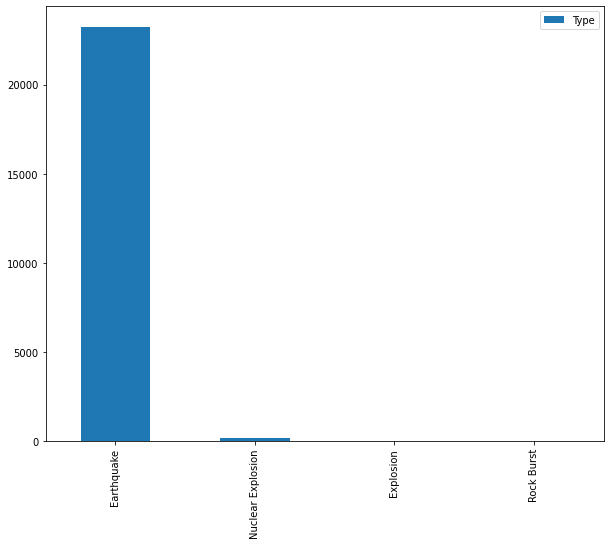

In [28]:
Disaster_type= df['Type'].value_counts()
df_2 = pd.DataFrame([Disaster_type]).T
print (df_2)
df_2.plot(kind='bar',stacked=True, figsize=(10,8))

#### From above we can infer that, there were 4 types of Earthquake, out of which Naturally occuring Earthquake happens the most. Nuclear Explosion is manmade Earthquake, standing in 2nd position

#### b) Plotting a scatterplot to analyze the locations of Earthquake

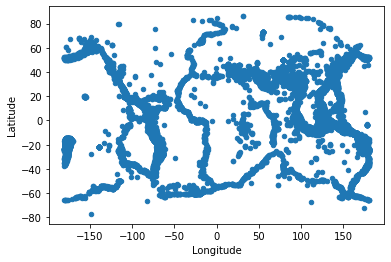

In [29]:
# Plotting Latitude and Longitude 

df.plot(x="Longitude", y="Latitude", kind="scatter")

#### Trying to plot these datapoints on a map. Here, I am using Geopandas library 

In [30]:
#To install the library
!pip3 install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 42.7 MB/s 


Importing the Geopandas library, and setting the path to get world map

In [31]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


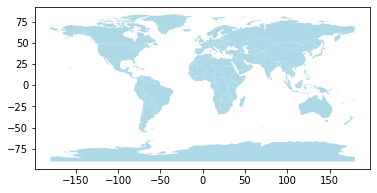

In [32]:
#Plotting all the countries
countries.plot(color="lightblue")

#### Plotting the datapoints ( Latitude and Longitude coordinates over world map)

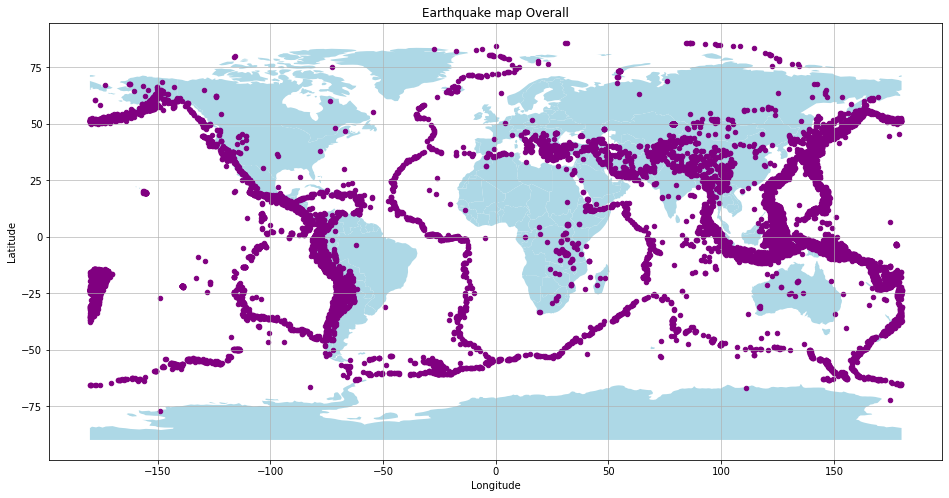

In [33]:
# Plotting the scatter plot over the world map

fig, ax = plt.subplots(figsize=(16,12))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightblue", ax=ax)

# plot points
df.plot(x="Longitude", y="Latitude", kind="scatter", c ='purple', 
        title=f"Earthquake map Overall", ax=ax)

# add grid
ax.grid(b=True, alpha=0.8)

plt.show()

#### From above diagram we can infere that, certain areas on Earth are Prone to Earthquake. These Epicenters lies exactly on some of the Tectonic Plates.


So one should avoid building houses with concrete in such areas

In [51]:
df['correct_date'] = pd.to_datetime(df['Date'],errors='coerce')
df.head(2)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,correct_date,Arry
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 00:00:00,0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 00:00:00,0


#### c) Analysing the graph between Magnitude of Earthquake and Year

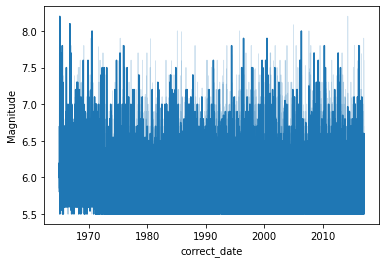

In [35]:
# Plotting a graph between "Magnitude" and "Year"

sns.lineplot(x="correct_date", y="Magnitude", data=df)

From above plot, we can infer that, Earthquake happens continously somewhere on Earth. So, probability of getting the Earthquake on the plotted location is high.

In [78]:
# df = df[df['correct_date'].astype(str) > '1980-08-07 00:00:00']

In [36]:
# sns.lineplot(x="correct_date", y="Magnitude", data=df)

#### d) Analyzing Density of Magnitude 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


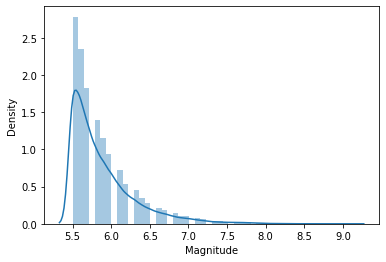

<Figure size 432x288 with 0 Axes>

In [37]:
from scipy import stats
sns.distplot(df['Magnitude']);
fig = plt.figure()
# res = stats.probplot(df['Magnitude'], plot=plt)

From, above graph, we can infer that 5.5 Richter scale magnitude is most common magnitude for the Earthquake. But there are some exceptions also magnitude above 8.

#### e) Analyze the Magnitude Vs Type of Earthquake


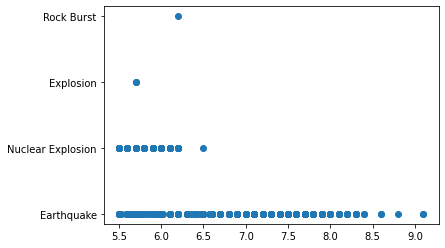

In [93]:
plt.scatter(df["Magnitude"],df["Type"])

From above we can infer that, for other types like "Rock burst,explosion/ neuclear Explosion" magnitude doesnt exceed value ~ 6.5 

## Implementing different models on dataset

### a) Applying K-means clustering

Plotting normal scatter plot between Magnitude and Depth of the Epicenter.

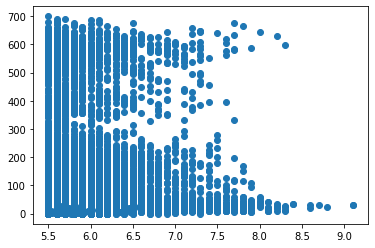

In [48]:
plt.scatter(df["Magnitude"],df["Depth"])

Importing libaries to perform K-means clustering using Scikit learn

In [49]:
from sklearn import mixture
from sklearn import neighbors, datasets
from sklearn.cluster import KMeans

In [41]:
X=df[['Magnitude','Depth']] # Implemeting on two columns of dataframe

Using the Elbow method to calculate the value of "K"

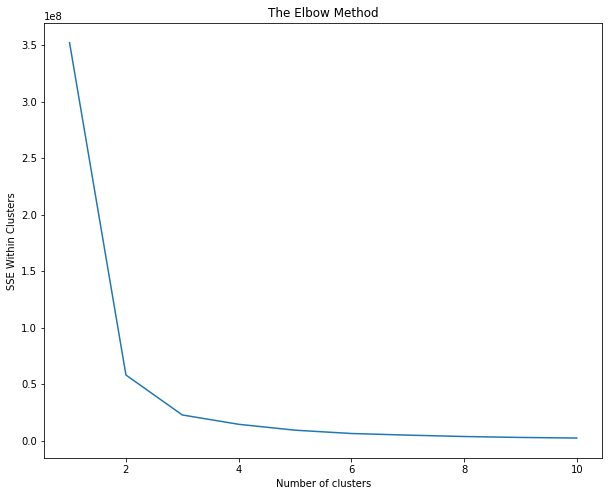

In [42]:
# Using Elbow method:
from sklearn.cluster import KMeans
plt.figure(figsize=(10,8))
# Within-Cluster-Sum-of-Squares 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE Within Clusters')
plt.show()

From above we can decide the value for : K = 2

In [43]:
# Training the model
km=KMeans(n_clusters=2 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_km = km.fit_predict(X)
y_km


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [44]:
df['Arry'] = y_km

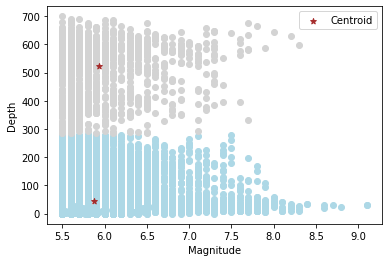

In [45]:
#plotting the clusters created by K-means algorithm
df1 = df[df.Arry==0]
df2 = df[df.Arry==1]
# df3 = df[df.Arry==2]
plt.scatter(df1.Magnitude,df1.Depth,color = 'lightblue')
plt.scatter(df2.Magnitude,df2.Depth, color = 'lightgray')
# plt.scatter(df3.Magnitude,df3.Depth, color = 'cyan')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color ='brown', marker='*', label ='Centroid')

plt.xlabel("Magnitude")
plt.ylabel('Depth')
plt.legend()

K- means algorithm has created two clusters for us. We can use these cluster to analyze seismic activities

### Regression Model:

Plotting the correlation matrix:


Input latitude longitude: find the probability of earthquake at the location - classification


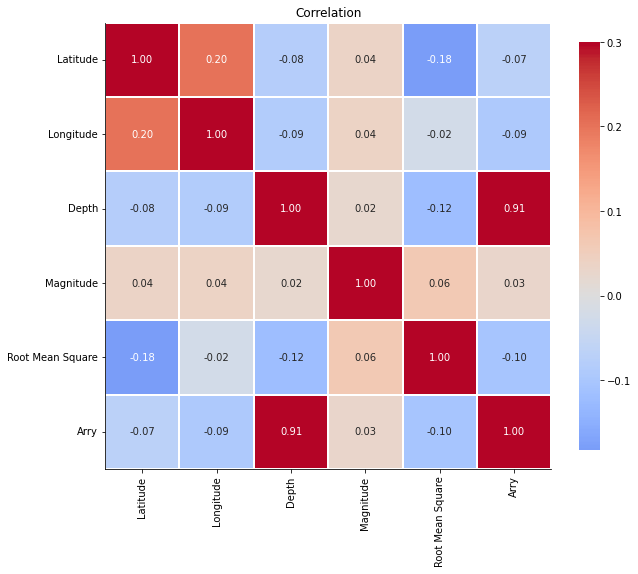

In [53]:
corr = df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(10,15)
plt.title('Correlation')
plt.show()

From above correlation, we can infer that Latitude and Logitude has pretty good matching. So will be implementing classification model on these two attributes.

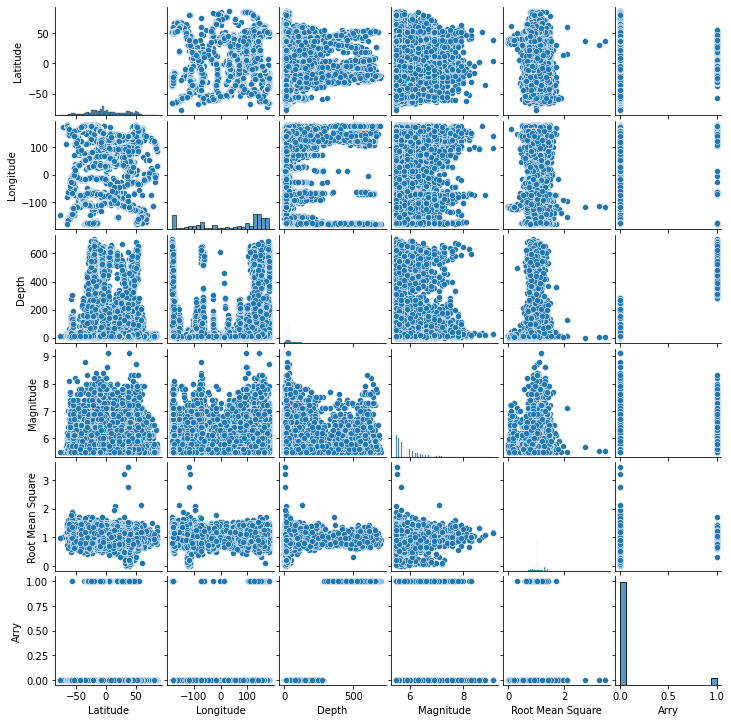

In [55]:
his_plot = sns.pairplot(df, diag_kind="hist")
his_plot.fig.set_size_inches(10,10)

In [69]:
from sklearn import model_selection
from sklearn import svm
X = df[['Longitude','Latitude']]

Y = df['Arry']

In [70]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.4, random_state=0)

In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
# y_pred=model.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
predictions = model.predict(X_test)

In [83]:
from sklearn import metrics
# Checking the model acuracy
print("Accuracy:",metrics.accuracy_score(Y_test, predictions))
# plt.scatter(Y_test, predictions)

Accuracy: 0.9889992523763751


### Above, I have implmented RandomForest Classifier using Scikit learn library. And got 98% accuracy

In [71]:
# clf_ob = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", 
         "Naive Bayes"# "QDA"
         ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]
    # QuadraticDiscriminantAnalysis()]

In [72]:
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, Y_train)
    score = 100.0 * clf.score(X_test, Y_test)
    # print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 98.88,
Classifier = Linear SVM, Score (test, accuracy) = 94.29,
Classifier = RBF SVM, Score (test, accuracy) = 98.74,
Classifier = Decision Tree, Score (test, accuracy) = 97.04,
Classifier = Random Forest, Score (test, accuracy) = 97.04,
Classifier = Neural Net, Score (test, accuracy) = 94.29,
Classifier = AdaBoost, Score (test, accuracy) = 96.44,
Classifier = Naive Bayes, Score (test, accuracy) = 94.29,
--------------------------------------------------------------------------------
Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 98.88


From above, we can say that in future the plotted Latitude and Longitude places are prone to get another Earthquake.

To implement above Muller loop I have taken the reference of :https://github.com/aarsanjani/applied-ml-2020/blob/master/MullerLoop.ipynb

This was one of the reference links from CMPE 257


#### Thank you